In [2]:
import numpy as np

In [3]:
import pandas as pd

In [4]:
import seaborn as sns

In [5]:
import matplotlib.pyplot as plt


In [43]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split



In [7]:
dataset = pd.read_csv (r'C:\Users\Mani\Desktop\Data Mining & ML\loan dataset\Training Data.csv')
dataset.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [8]:
dataset.shape

(252000, 13)

In [9]:
dataset.describe()


,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,252000.000000,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,126000.500000,4.997117e+06,49.954071,10.084437,6.333877,11.997794,0.123000
std,72746.278255,2.878311e+06,17.063855,6.002590,3.647053,1.399037,0.328438
min,1.000000,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,63000.750000,2.503015e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,126000.500000,5.000694e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,189000.250000,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,252000.000000,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


In [10]:
#as the colummn id is serial number we delete that column
dataset.drop('Id',axis=1,inplace= True)


In [11]:
#checking null values
pd.isnull(dataset).sum()

Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

In [12]:
#checking correlation
dataset.corr()

,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
Income,1.000000,-0.000652,0.006422,0.007045,-0.002397,-0.003091
Age,-0.000652,1.000000,-0.001118,0.002154,-0.020134,-0.021809
Experience,0.006422,-0.001118,1.000000,0.646098,0.019309,-0.034523
CURRENT_JOB_YRS,0.007045,0.002154,0.646098,1.000000,0.005372,-0.016942
CURRENT_HOUSE_YRS,-0.002397,-0.020134,0.019309,0.005372,1.000000,-0.004375
Risk_Flag,-0.003091,-0.021809,-0.034523,-0.016942,-0.004375,1.000000


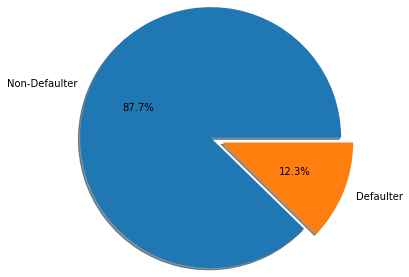

In [13]:
r = dataset.groupby("Risk_Flag")['Risk_Flag'].count()
plt.pie(r, explode=[0.05, 0.1], labels=['Non-Defaulter', 'Defaulter'], radius=1.5, autopct='%1.1f%%',  shadow=True)
;
plt.show()


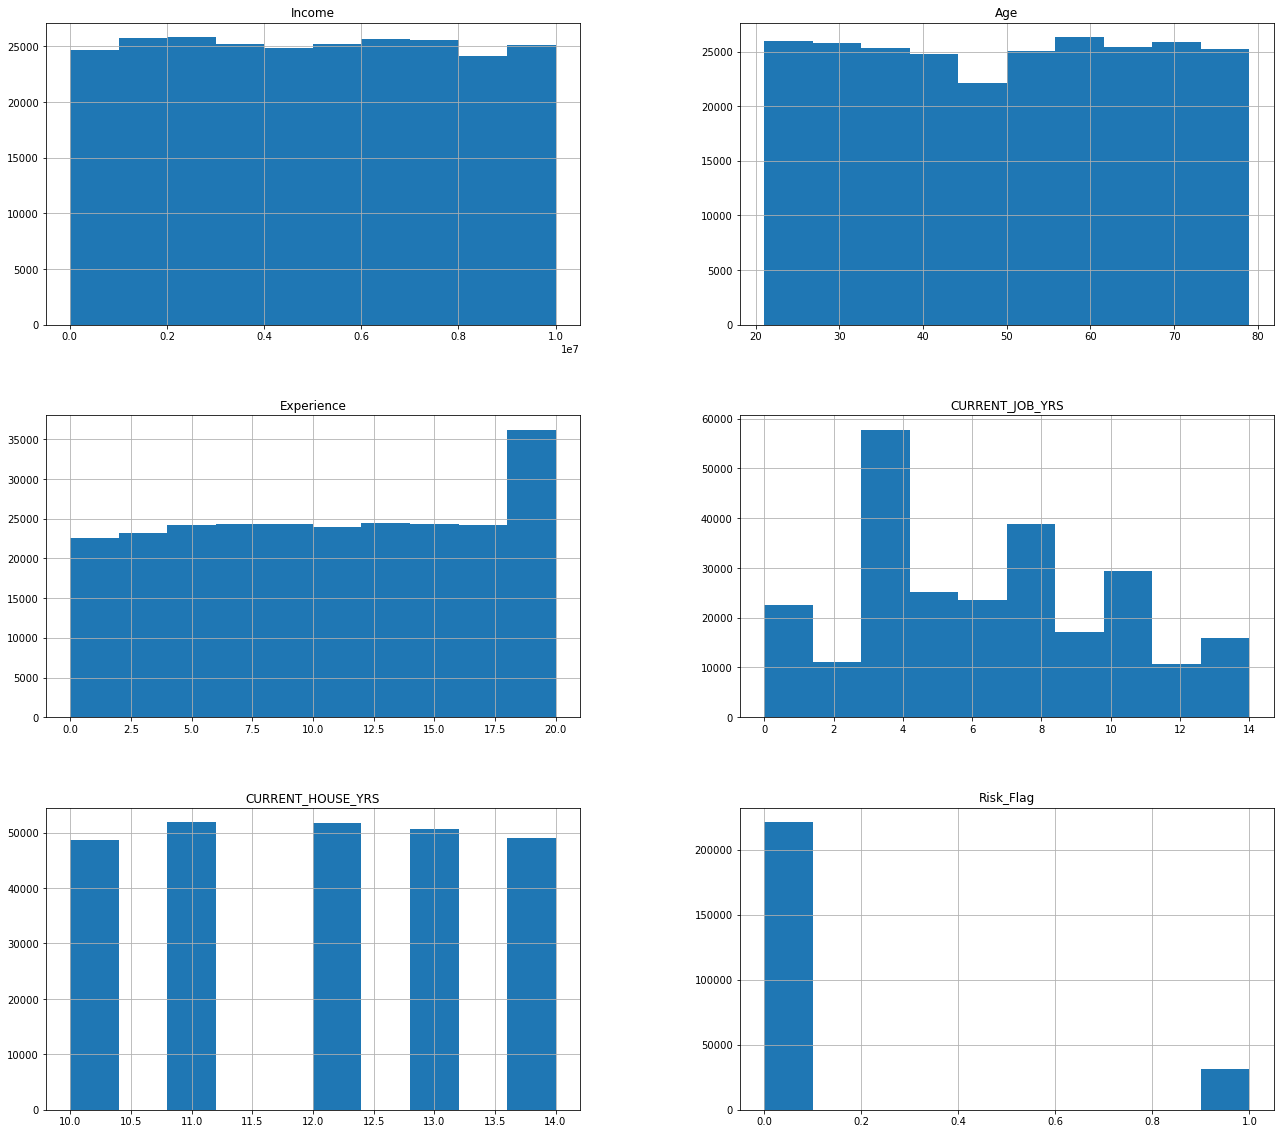

In [14]:
dataset.hist( figsize = (22, 20) )
plt.show()


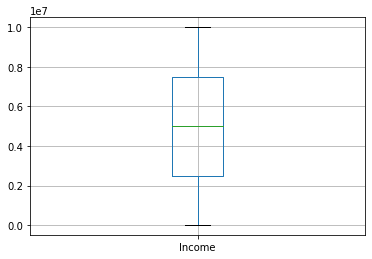

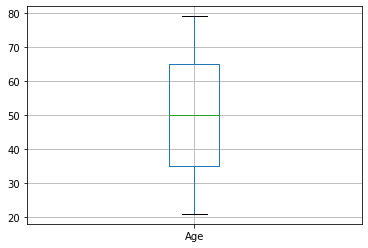

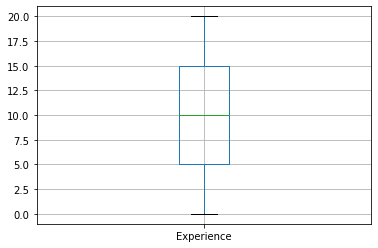

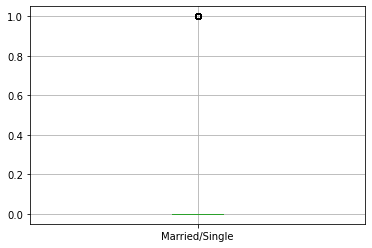

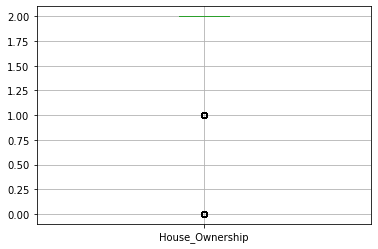

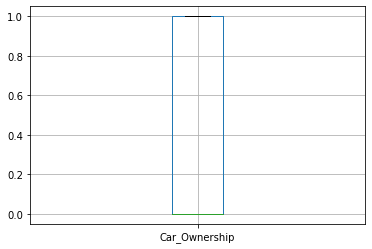

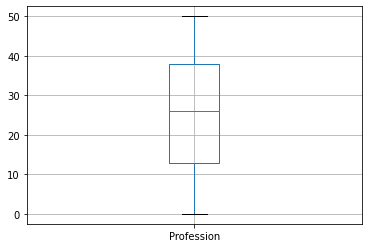

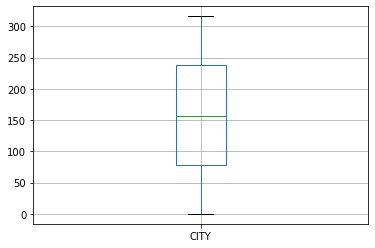

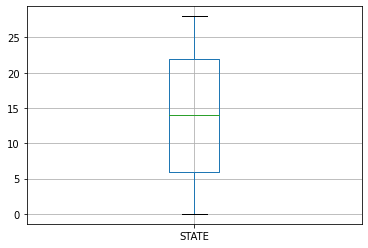

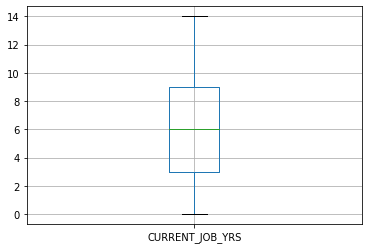

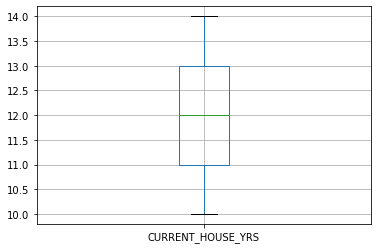

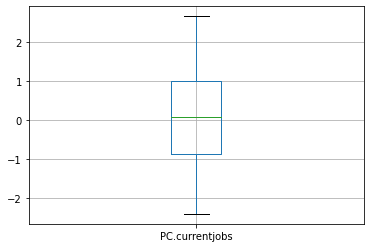

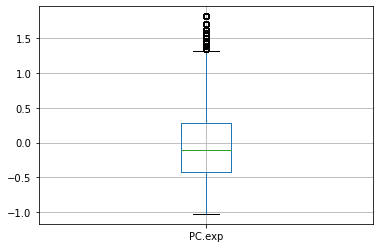

In [67]:
#checking for outliers
for column in dataset._get_numeric_data():
    plt.figure()
    dataset.boxplot([column])


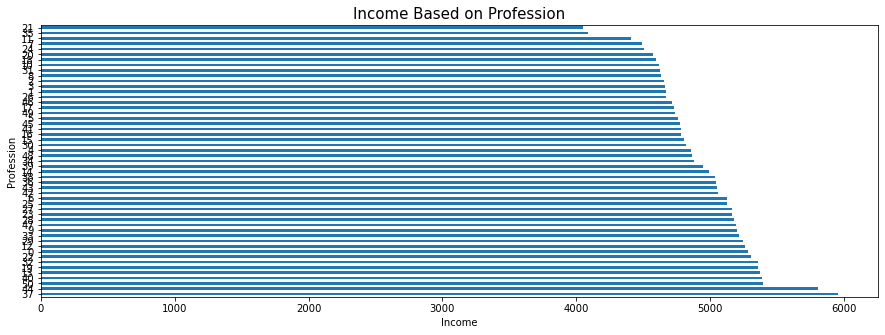

In [82]:
#income based on profession
plt.figure(figsize=(15,5))
plt.title("Income Based on Profession", size = 15)
dataset['Profession'].value_counts().plot(kind='barh')
plt.xlabel('Income');
plt.ylabel('Profession');




Text(0.5, 1.0, 'Income Based on Age')

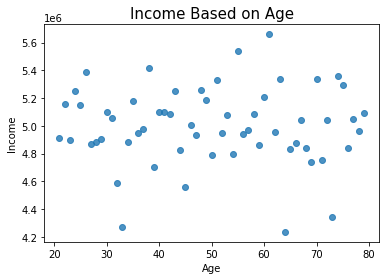

In [17]:
#income based on age
sns.regplot(data=dataset.groupby('Age',as_index=False)['Income'].mean()
,x="Age",y="Income",fit_reg=False);
plt.xlabel("Age");
plt.ylabel('Income');
plt.title("Income Based on Age", size = 15)


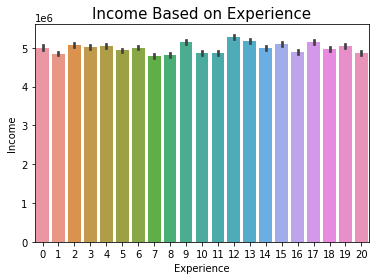

In [18]:
#income based on experience
plt.title("Income Based on Experience", size = 15)
sns.barplot(x='Experience',y='Income',data=dataset)
plt.show()


Text(0.5, 1.0, 'Risk Flag based on current Job')

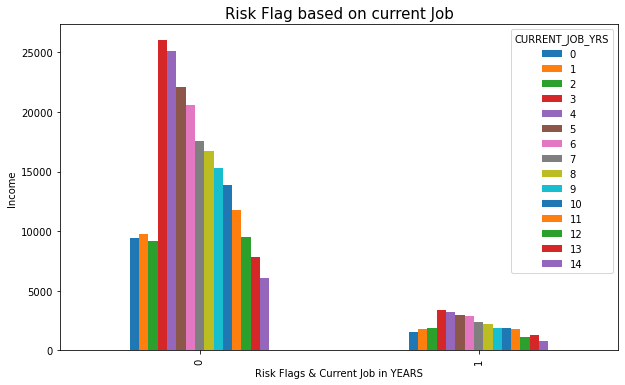

In [19]:
pd.crosstab(dataset.Risk_Flag,dataset.CURRENT_JOB_YRS).plot(kind= "bar",figsize = (10,6) )
plt.xlabel("Risk Flags & Current Job in YEARS");
plt.ylabel('Income');
plt.title("Risk Flag based on current Job", size = 15)


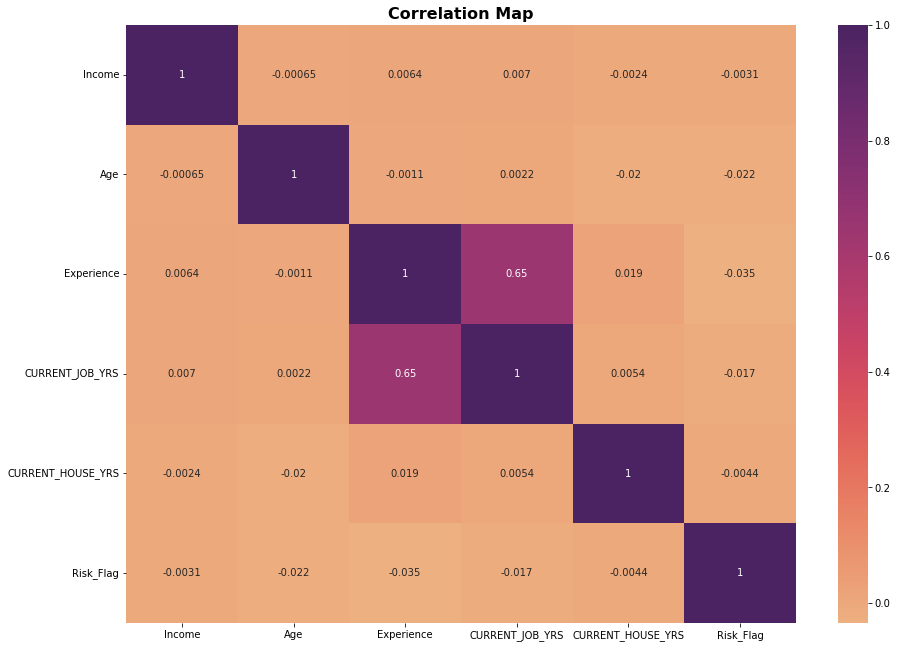

In [20]:
#correlation table
correlation=dataset.corr()
plt.figure(figsize=(15,11))
sns.heatmap(dataset.corr(), cmap='flare', annot = True)
plt.title("Correlation Map", fontweight = "bold", fontsize=16)
plt.show()

In [21]:
#coverting discrete values in column married/single, carownership to 1,0
dataset["Married/Single"]= pd.Series(np.where(dataset["Married/Single"].values =='married', 1, 0), dataset.index)
dataset["Car_Ownership"]= pd.Series(np.where(dataset["Car_Ownership"].values =='yes', 1, 0), dataset.index)

In [22]:
#as we can see in correlation table, experience & current job years columns are highly related than others.there might be repeated values in row values in dataset. SO data transformation is required ie.PCA
#formula is (value-mean)/standard deviation
columns=["CURRENT_JOB_YRS","Experience"]
dataPCA=dataset[columns]
transformedDF=(dataPCA-dataPCA.mean(axis=0))/dataPCA.std()
transformedDF

,CURRENT_JOB_YRS,Experience
0,-0.914129,-1.180230
1,0.731035,-0.014067
2,-0.639935,-1.013635
3,-1.188323,-1.346825
4,-0.914129,0.152528
...,...,...
251995,-0.091547,0.485718
251996,-0.091547,-0.014067
251997,0.182647,-0.513851
251998,-1.736711,-1.680014


In [23]:
#applying PCA(principle component analysis) method to transformed DF
pca=PCA(n_components=2)
PC=pca.fit_transform(transformedDF)
principle=pd.DataFrame(data=PC,columns=['PC.currentjobs','PC.exp'])
principle.head()

,PC.currentjobs,PC.exp
0,-1.480935,-0.188162
1,0.506973,-0.526866
2,-1.169251,-0.264246
3,-1.792620,-0.112078
4,-0.538533,0.754240


In [24]:
#adding PCA columns into dataset
dataset=pd.concat([dataset,principle],axis=1)
dataset.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,PC.currentjobs,PC.exp
0,1303834,23,3,0,rented,0,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0,-1.480935,-0.188162
1,7574516,40,10,0,rented,0,Software_Developer,Parbhani,Maharashtra,9,13,0,0.506973,-0.526866
2,3991815,66,4,1,rented,0,Technical_writer,Alappuzha,Kerala,4,10,0,-1.169251,-0.264246
3,6256451,41,2,0,rented,1,Software_Developer,Bhubaneswar,Odisha,2,12,1,-1.792620,-0.112078
4,5768871,47,11,0,rented,0,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1,-0.538533,0.754240


In [25]:
#changing categorical values into numerical for training & test datasets by label encoder
cat_col=['House_Ownership','CITY',"STATE","Profession"]
label_encoder=LabelEncoder()
for col in cat_col:
    dataset[col]=label_encoder.fit_transform(dataset[col])
dataset

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,PC.currentjobs,PC.exp
0,1303834,23,3,0,2,0,33,251,13,3,13,0,-1.480935,-0.188162
1,7574516,40,10,0,2,0,43,227,14,9,13,0,0.506973,-0.526866
2,3991815,66,4,1,2,0,47,8,12,4,10,0,-1.169251,-0.264246
3,6256451,41,2,0,2,1,43,54,17,2,12,1,-1.792620,-0.112078
4,5768871,47,11,0,2,0,11,296,22,3,14,1,-0.538533,0.754240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251995,8154883,43,13,0,2,0,45,162,28,6,11,0,0.278721,0.408188
251996,2843572,26,10,0,2,0,3,251,13,6,11,0,-0.074680,0.054787
251997,4522448,46,7,0,2,0,17,144,14,7,12,0,-0.234197,-0.492498
251998,6507128,45,0,0,2,0,27,233,18,0,10,0,-2.415990,0.040091


In [26]:
#popping target variable from dataset & assiging to test dataset
#here the target variable is riskflag
if 'Risk_Flag' in dataset.columns:
    target_data=dataset.pop('Risk_Flag')
target_data


0         0
1         0
2         0
3         1
4         1
         ..
251995    0
251996    0
251997    0
251998    0
251999    0
Name: Risk_Flag, Length: 252000, dtype: int64

In [27]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target = train_test_split(dataset,target_data, test_size=0.2)


In [28]:
#scalling the data
#column wise normalization: subtracting mean & divifing with standard deviation,sothat column will be centere 0 & have unit standard deviation
mean = train_data.mean()
train_data -= mean
std = train_data.std()
train_data /= std

test_data -= mean
test_data /= std


In [29]:
train_data.shape

(201600, 13)

In [30]:
train_target.shape

(201600,)

In [31]:
test_data.shape

(50400, 13)

In [32]:
test_target.shape

(50400,)

Accuracy of DecisionTree classifier on training set: 0.93642
Accuracy of DecisionTree classifier on test set: 0.88133
F1 Score: 0.5404533230887437

              precision    recall  f1-score   support

           0       0.94      0.92      0.93     44222
           1       0.51      0.57      0.54      6178

    accuracy                           0.88     50400
   macro avg       0.73      0.75      0.74     50400
weighted avg       0.89      0.88      0.88     50400



D:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


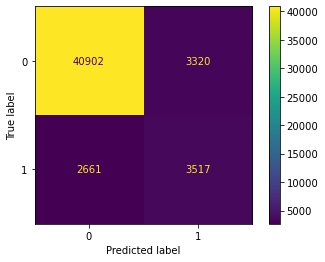

In [54]:
#decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix

dt = DecisionTreeClassifier()
dt.fit(train_data,train_target)
pred = dt.predict(test_data)
print('Accuracy of DecisionTree classifier on training set: {:.5f}'.format(dt.score(train_data, train_target)))
print('Accuracy of DecisionTree classifier on test set: {:.5f}'.format(dt.score(test_data, test_target)))

print(f'F1 Score: {f1_score(test_target,pred)}\n')
print(classification_report(test_target,pred))
plot_confusion_matrix(estimator=dt,X=test_data,y_true=test_target)


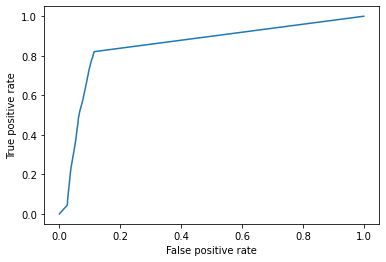

In [48]:
#assigning values
from sklearn import metrics
pre=dt.predict_proba(test_data)[::,1]
falsepr,truepr,_=metrics.roc_curve(test_target, pre)
#ROC curve
plt.plot(falsepr,truepr)
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.show()

Accuracy of Random Forest Classifier on training set: 0.93640
Accuracy of Random Forest Classifier on test set: 0.89958
F1 Score: 0.5672509619495509

              precision    recall  f1-score   support

           0       0.94      0.95      0.94     44222
           1       0.60      0.54      0.57      6178

    accuracy                           0.90     50400
   macro avg       0.77      0.74      0.76     50400
weighted avg       0.90      0.90      0.90     50400



D:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


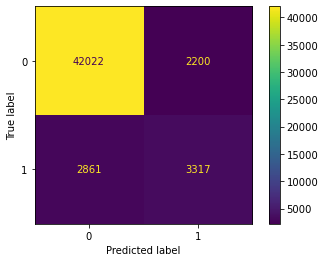

In [79]:
#random forest
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier()
RFC.fit(train_data, train_target)

print('Accuracy of Random Forest Classifier on training set: {:.5f}'.format(RFC.score(train_data, train_target)))
print('Accuracy of Random Forest Classifier on test set: {:.5f}'.format(RFC.score(test_data, test_target)))
pred = RFC.predict(test_data)
print(f'F1 Score: {f1_score(test_target,pred)}\n')
print(classification_report(test_target,pred))
plot_confusion_matrix(estimator=RFC,X=test_data,y_true=test_target)




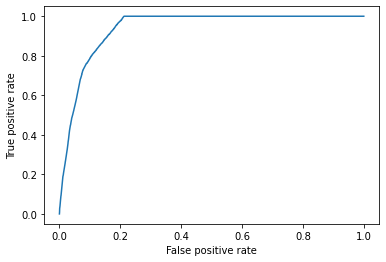

In [64]:
#assigning values
from sklearn import metrics
pre=RFC.predict_proba(test_data)[::,1]
falsepr,truepr,_=metrics.roc_curve(test_target, pre)
#ROC curve
plt.plot(falsepr,truepr)
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.show()


Accuracy of KNN classifier on training set: 0.90
Accuracy of KNN classifier on test set: 0.89
F1 Score: 0.5300713557594291

              precision    recall  f1-score   support

           0       0.93      0.94      0.94     44222
           1       0.56      0.51      0.53      6178

    accuracy                           0.89     50400
   macro avg       0.74      0.72      0.73     50400
weighted avg       0.89      0.89      0.89     50400



D:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


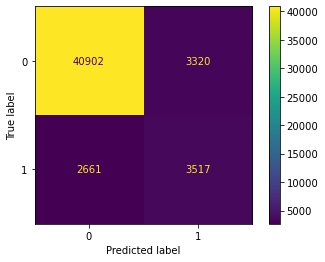

In [81]:
#knn 
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(train_data, train_target)
pred = knn.predict(test_data)

print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn.score(train_data, train_target)))
print('Accuracy of KNN classifier on test set: {:.2f}'
     .format(knn.score(test_data, test_target)))
print(f'F1 Score: {f1_score(test_target,pred)}\n')
print(classification_report(test_target,pred))
plot_confusion_matrix(estimator=dt,X=test_data,y_true=test_target)




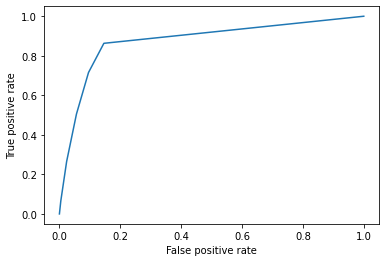

In [68]:
#assigning values
from sklearn import metrics
pre=knn.predict_proba(test_data)[::,1]
falsepr,truepr,_=metrics.roc_curve(test_target, pre)
#ROC curve
plt.plot(falsepr,truepr)
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.show()
